In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [57]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [137]:
x.isnull().sum()


CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Germany            0
Spain              0
Male               0
dtype: int64

In [136]:
y.isnull().sum()

0

In [58]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [59]:
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)


In [60]:
x=pd.concat([x,geography,gender],axis=1)
x


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [61]:
x=x.drop(['Geography','Gender'],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [64]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [76]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf

In [79]:

initializer=initializer = tf.keras.initializers.HeNormal()
model = Sequential()
model.add(Dense(12, input_shape=(11,), activation='relu'))
model.add(Dense(8, activation='relu',kernel_initializer=initializer))
model.add(Dense(1, activation='sigmoid'))

In [80]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [98]:
mode=model.fit(x, y,validation_split=0.33, epochs=40, batch_size=10)

Epoch 1/40
670/670 [==============================] - 2s 3ms/step - loss: 4.1145 - accuracy: 0.6943 - val_loss: 1.1478 - val_accuracy: 0.7964
Epoch 2/40
670/670 [==============================] - 2s 3ms/step - loss: 3.6167 - accuracy: 0.7246 - val_loss: 1.5618 - val_accuracy: 0.7843
Epoch 3/40
670/670 [==============================] - 2s 3ms/step - loss: 3.4735 - accuracy: 0.7349 - val_loss: 3.1154 - val_accuracy: 0.7995
Epoch 4/40
670/670 [==============================] - 2s 3ms/step - loss: 3.6270 - accuracy: 0.7359 - val_loss: 2.0439 - val_accuracy: 0.7970
Epoch 5/40
670/670 [==============================] - 2s 3ms/step - loss: 2.2636 - accuracy: 0.7492 - val_loss: 2.5177 - val_accuracy: 0.8001
Epoch 6/40
670/670 [==============================] - 3s 5ms/step - loss: 2.6385 - accuracy: 0.7500 - val_loss: 1.4153 - val_accuracy: 0.7988
Epoch 7/40
670/670 [==============================] - 2s 4ms/step - loss: 2.2254 - accuracy: 0.7458 - val_loss: 1.3843 - val_accuracy: 0.6789
Epoch 

In [123]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.7975


[0.6908572912216187, 0.7975000143051147]

In [124]:
import mplcyberpunk

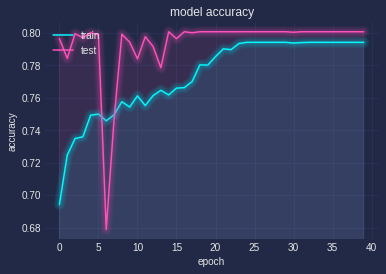

In [125]:
plt.style.use("cyberpunk")
plt.plot(mode.history['accuracy'])
plt.plot(mode.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
mplcyberpunk.add_glow_effects()
plt.show()

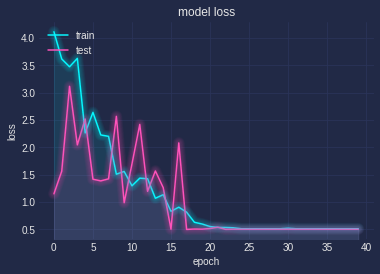

In [126]:
plt.style.use("cyberpunk")
plt.plot(mode.history['loss'])
plt.plot(mode.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
mplcyberpunk.add_glow_effects()
plt.show()

In [127]:
print(mode.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [128]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [129]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [130]:
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(y_test, y_pred)

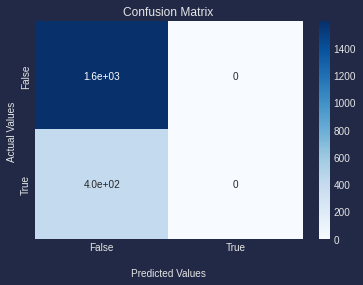

In [131]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [118]:
cf_matrix

array([[1595,    0],
       [ 405,    0]])

In [138]:
model.save("Churn_Modelling.h5")